In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['people.csv', 'act_test.csv', 'RedHatCompetion.ipynb', 'act_train.csv', 'people.csv.zip', 'act_train.csv.zip', 'sample_submission.csv.zip', 'sample_submission.csv', 'act_test.csv.zip']


In [4]:
people = pd.read_csv('./input/people.csv')
train = pd.read_csv('./input/act_train.csv')
test = pd.read_csv('./input/act_test.csv')

In [5]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [6]:
train.head(100)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
5,ppl_100,act2_898576,2023-08-04,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1727,0
6,ppl_100002,act2_1233489,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
7,ppl_100002,act2_1623405,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
8,ppl_100003,act2_1111598,2023-02-07,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
9,ppl_100003,act2_1177453,2023-06-28,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1


In [7]:
joined_train = pd.merge(train, people, how="inner", on="people_id", suffixes=('', '_people'))

In [8]:
joined_train = joined_train.fillna(0)

In [9]:
joined_train['date'] = pd.to_datetime(joined_train['date']).dt.tz_localize('Asia/Tokyo')
joined_train['date'] = joined_train['date'].astype('int64')

joined_train['date_people'] = pd.to_datetime(joined_train['date_people']).dt.tz_localize('Asia/Tokyo')
joined_train['date_people'] = joined_train['date_people'].astype('int64')

In [10]:
for key in joined_train.columns.values:
    if type(joined_train[key][0]) is str:
        joined_train[key] = pd.factorize(joined_train[key])[0]
    elif type(joined_train[key][0]) == np.bool_:
        joined_train[key] = list(map(lambda x: x * 1, joined_train[key]))

In [11]:
joined_train.head(100)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,0,0,1692975600000000000,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
1,0,1,1664204400000000000,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
2,0,2,1664204400000000000,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
3,0,3,1691074800000000000,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
4,0,4,1692975600000000000,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
5,0,5,1691074800000000000,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,1,0,36
6,1,6,1669129200000000000,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,76
7,1,7,1669129200000000000,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,0,76
8,2,8,1675695600000000000,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,99
9,2,9,1687878000000000000,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,99


In [12]:
# 正規化の不完全性の検証 60sくらいかかる
unvalid_columns = set([])
for i in joined_train.columns.values:
    for j in joined_train[i]:
        if type(j) is str:
            unvalid_columns.add(i)

In [13]:
for unvalid_column in unvalid_columns:
    joined_train[unvalid_column] = pd.factorize(joined_train[unvalid_column])[0]

In [14]:
# 正規化の不完全性の検証 ここでunvalid_columns_2が空setになった
unvalid_columns_2 = set([])
for i in joined_train.columns.values:
    for j in joined_train[i]:
        if type(j) is str:
            unvalid_columns_2.add(i)

In [15]:
from sklearn.ensemble import RandomForestClassifier
joined_train_x = joined_train.drop('outcome', axis=1)
joined_train_y = joined_train.outcome
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(joined_train_x, joined_train_y)

/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
from copy import copy

joined_test = pd.merge(test, people, how="inner", on="people_id", suffixes=('', '_people'))
joined_test = joined_test.fillna(0)

test_activity_id = copy(joined_test["activity_id"])

joined_test['date'] = pd.to_datetime(joined_test['date']).dt.tz_localize('Asia/Tokyo')
joined_test['date'] = joined_test['date'].astype('int64')
joined_test['date_people'] = pd.to_datetime(joined_test['date_people']).dt.tz_localize('Asia/Tokyo')
joined_test['date_people'] = joined_test['date_people'].astype('int64')

for key in joined_test.columns.values:
    if type(joined_test[key][0]) is str:
        joined_test[key] = pd.factorize(joined_test[key])[0]
    elif type(joined_test[key][0]) == np.bool_:
        joined_test[key] = list(map(lambda x: x * 1, joined_test[key]))
        
unvalid_columns_for_test = set([])
for i in joined_test.columns.values:
    for j in joined_test[i]:
        if type(j) is str:
            unvalid_columns_for_test.add(i)        
        
for unvalid_column in unvalid_columns_for_test:
    joined_test[unvalid_column] = pd.factorize(joined_test[unvalid_column])[0]

In [17]:
joined_test.head(100)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,0,0,1658242800000000000,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,76
1,0,1,1658242800000000000,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,76
2,1,2,1665673200000000000,0,2,2,0,2,0,0,...,0,1,1,1,1,1,1,1,1,90
3,1,3,1669474800000000000,0,3,0,0,2,0,0,...,0,1,1,1,1,1,1,1,1,90
4,1,4,1665759600000000000,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,90
5,1,5,1669474800000000000,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,90
6,1,6,1665759600000000000,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,90
7,1,7,1665759600000000000,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,90
8,1,8,1665759600000000000,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,90
9,1,9,1669561200000000000,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,90


In [18]:
result = clf.predict(joined_test)
my_solution = copy(test_activity_id)
df_my_solution = pd.DataFrame(my_solution)
df_my_solution["outcome"] = result

from datetime import datetime, timedelta, timezone
JST = timezone(timedelta(hours=+9), 'JST')
ts = datetime.now(JST).strftime('%y%m%d%H%M')

df_my_solution.to_csv(('submit_'+ts+'.csv'), index=False)

In [19]:
clf.feature_importances_

array([0.03389626, 0.04379783, 0.04800822, 0.00691751, 0.00084024,
       0.00079539, 0.0007386 , 0.00073391, 0.00061531, 0.00057518,
       0.000693  , 0.00084731, 0.00085325, 0.01862052, 0.00732657,
       0.19146475, 0.14522985, 0.0393751 , 0.0191517 , 0.01669031,
       0.01388861, 0.03446258, 0.03688018, 0.03182183, 0.02750818,
       0.01121114, 0.0025871 , 0.00242779, 0.02379179, 0.00328298,
       0.00942392, 0.00303172, 0.00218678, 0.00277389, 0.00208647,
       0.00353138, 0.00145059, 0.00295499, 0.00272364, 0.00214054,
       0.01287748, 0.00288408, 0.00264326, 0.00944429, 0.00269795,
       0.00194936, 0.00537252, 0.00391004, 0.00284419, 0.00616884,
       0.00300425, 0.02159419, 0.00188119, 0.12539142])

In [20]:
joined_train_x.columns.values

array(['people_id', 'activity_id', 'date', 'activity_category', 'char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7',
       'char_8', 'char_9', 'char_10', 'char_1_people', 'group_1',
       'char_2_people', 'date_people', 'char_3_people', 'char_4_people',
       'char_5_people', 'char_6_people', 'char_7_people', 'char_8_people',
       'char_9_people', 'char_10_people', 'char_11', 'char_12', 'char_13',
       'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19',
       'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25',
       'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31',
       'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37',
       'char_38'], dtype=object)

In [54]:
reduce_column_x = joined_train_x.loc[:, ["char_38", "group_1", "char_2_people"]]

In [56]:
reduce_column_x.head(2)

,char_38,group_1,char_2_people
0,36,0,0
1,36,0,0


In [57]:
clf_2 = RandomForestClassifier(random_state=0)
clf_2 = clf_2.fit(reduce_column_x, joined_train_y)

/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
reduce_column_test = joined_test.loc[:, ["char_38", "group_1", "char_2_people" ]]
result_2 = clf_2.predict(reduce_column_test)
my_solution_2 = copy(test_activity_id)
df_my_solution_2 = pd.DataFrame(my_solution_2)
df_my_solution_2["outcome"] = result_2

from datetime import datetime, timedelta, timezone
JST = timezone(timedelta(hours=+9), 'JST')
ts = datetime.now(JST).strftime('%y%m%d%H%M')

df_my_solution_2.to_csv(('reduce2_columns_submit_'+ts+'.csv'), index=False)

In [60]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

In [61]:
reduce_column_x.columns

Index(['char_38', 'group_1', 'char_2_people'], dtype='object')

In [63]:
est = clf_2.estimators_[0]
dot_str = export_graphviz(
    est,
    out_file=None,
    filled=True,
    max_depth=5,
    rounded=True,
    feature_names=["char_38", "group_1", "char_2_people"],
    class_names=["char_38", "group_1", "char_2_people"])

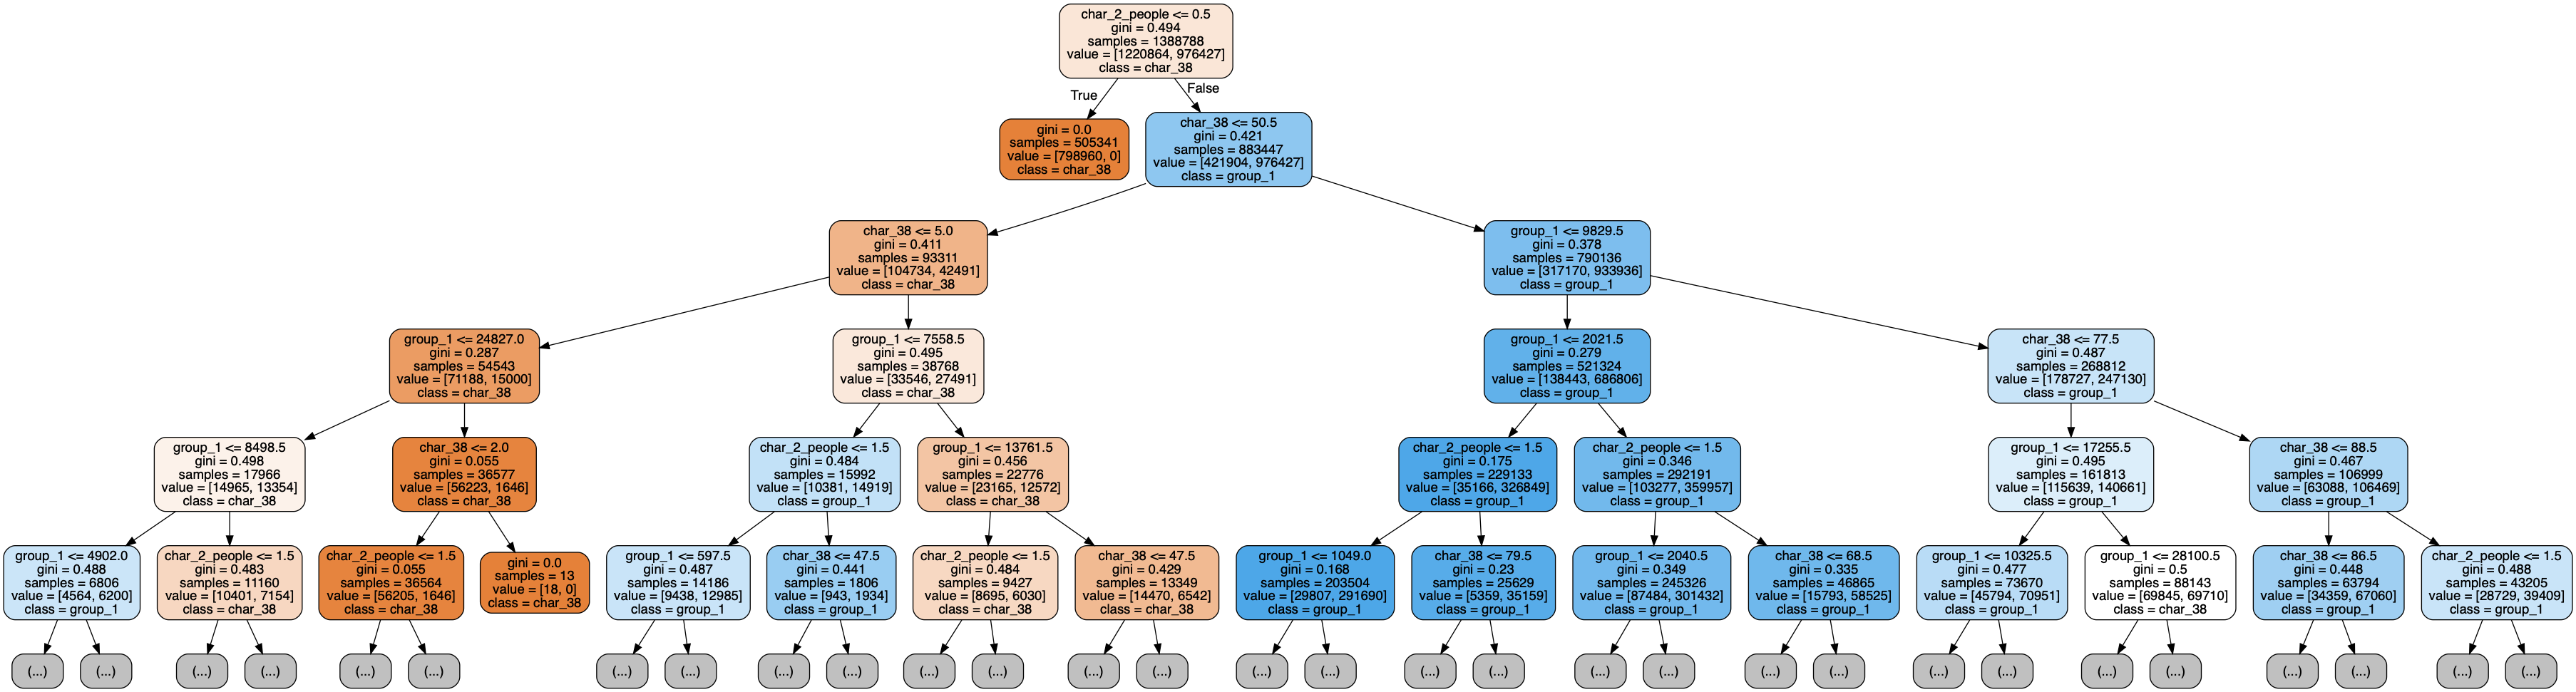

In [64]:
graph = pydotplus.graph_from_dot_data(dot_str)
graph.write_pdf("graph.pdf")
Image(graph.create_png())